# 연습 문제 8장 해답

#### 연습 문제 8.1.1의 답

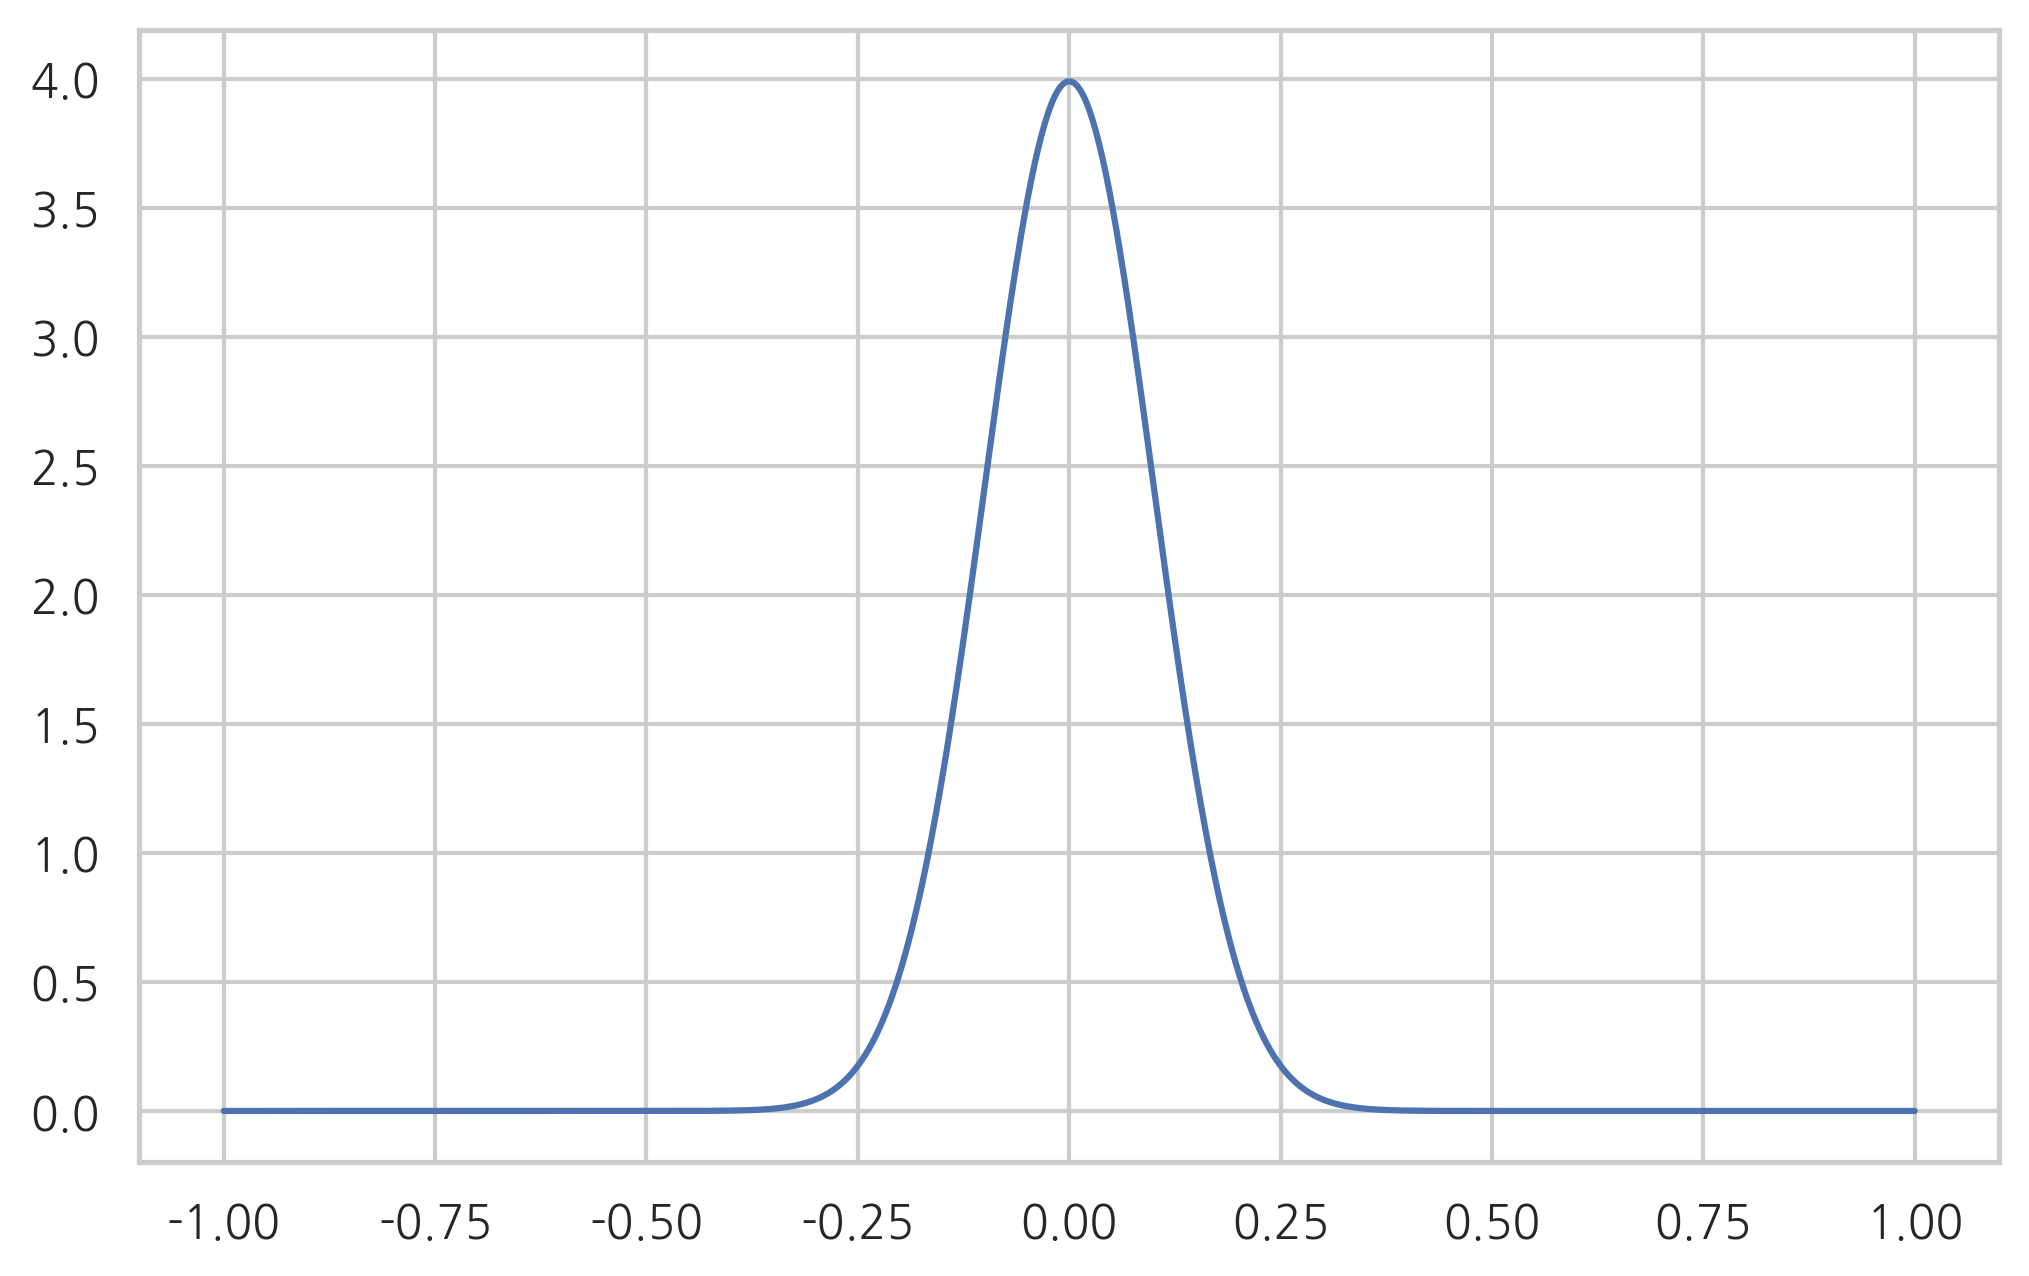

In [1]:
# (1) 확률밀도함수
rv = sp.stats.norm(loc=0, scale=0.1)
xx = np.linspace(-1, 1, 1000)
pdf = rv.pdf(xx)

plt.plot(xx, pdf)
plt.show()

In [2]:
# (2) x=0에서 최대값을 가진다.

rv.pdf(0)

3.989422804014327

#### 연습 문제 8.1.2의 답

In [3]:
np.random.seed(0)
x = sp.stats.norm().rvs(1000)
print("표본평균:", x.mean())
print("비편향 표본분산:", x.std(ddof=1))

표본평균: -0.045256707490195384
비편향 표본분산: 0.9875270456945128


#### 연습 문제 8.1.3의 답

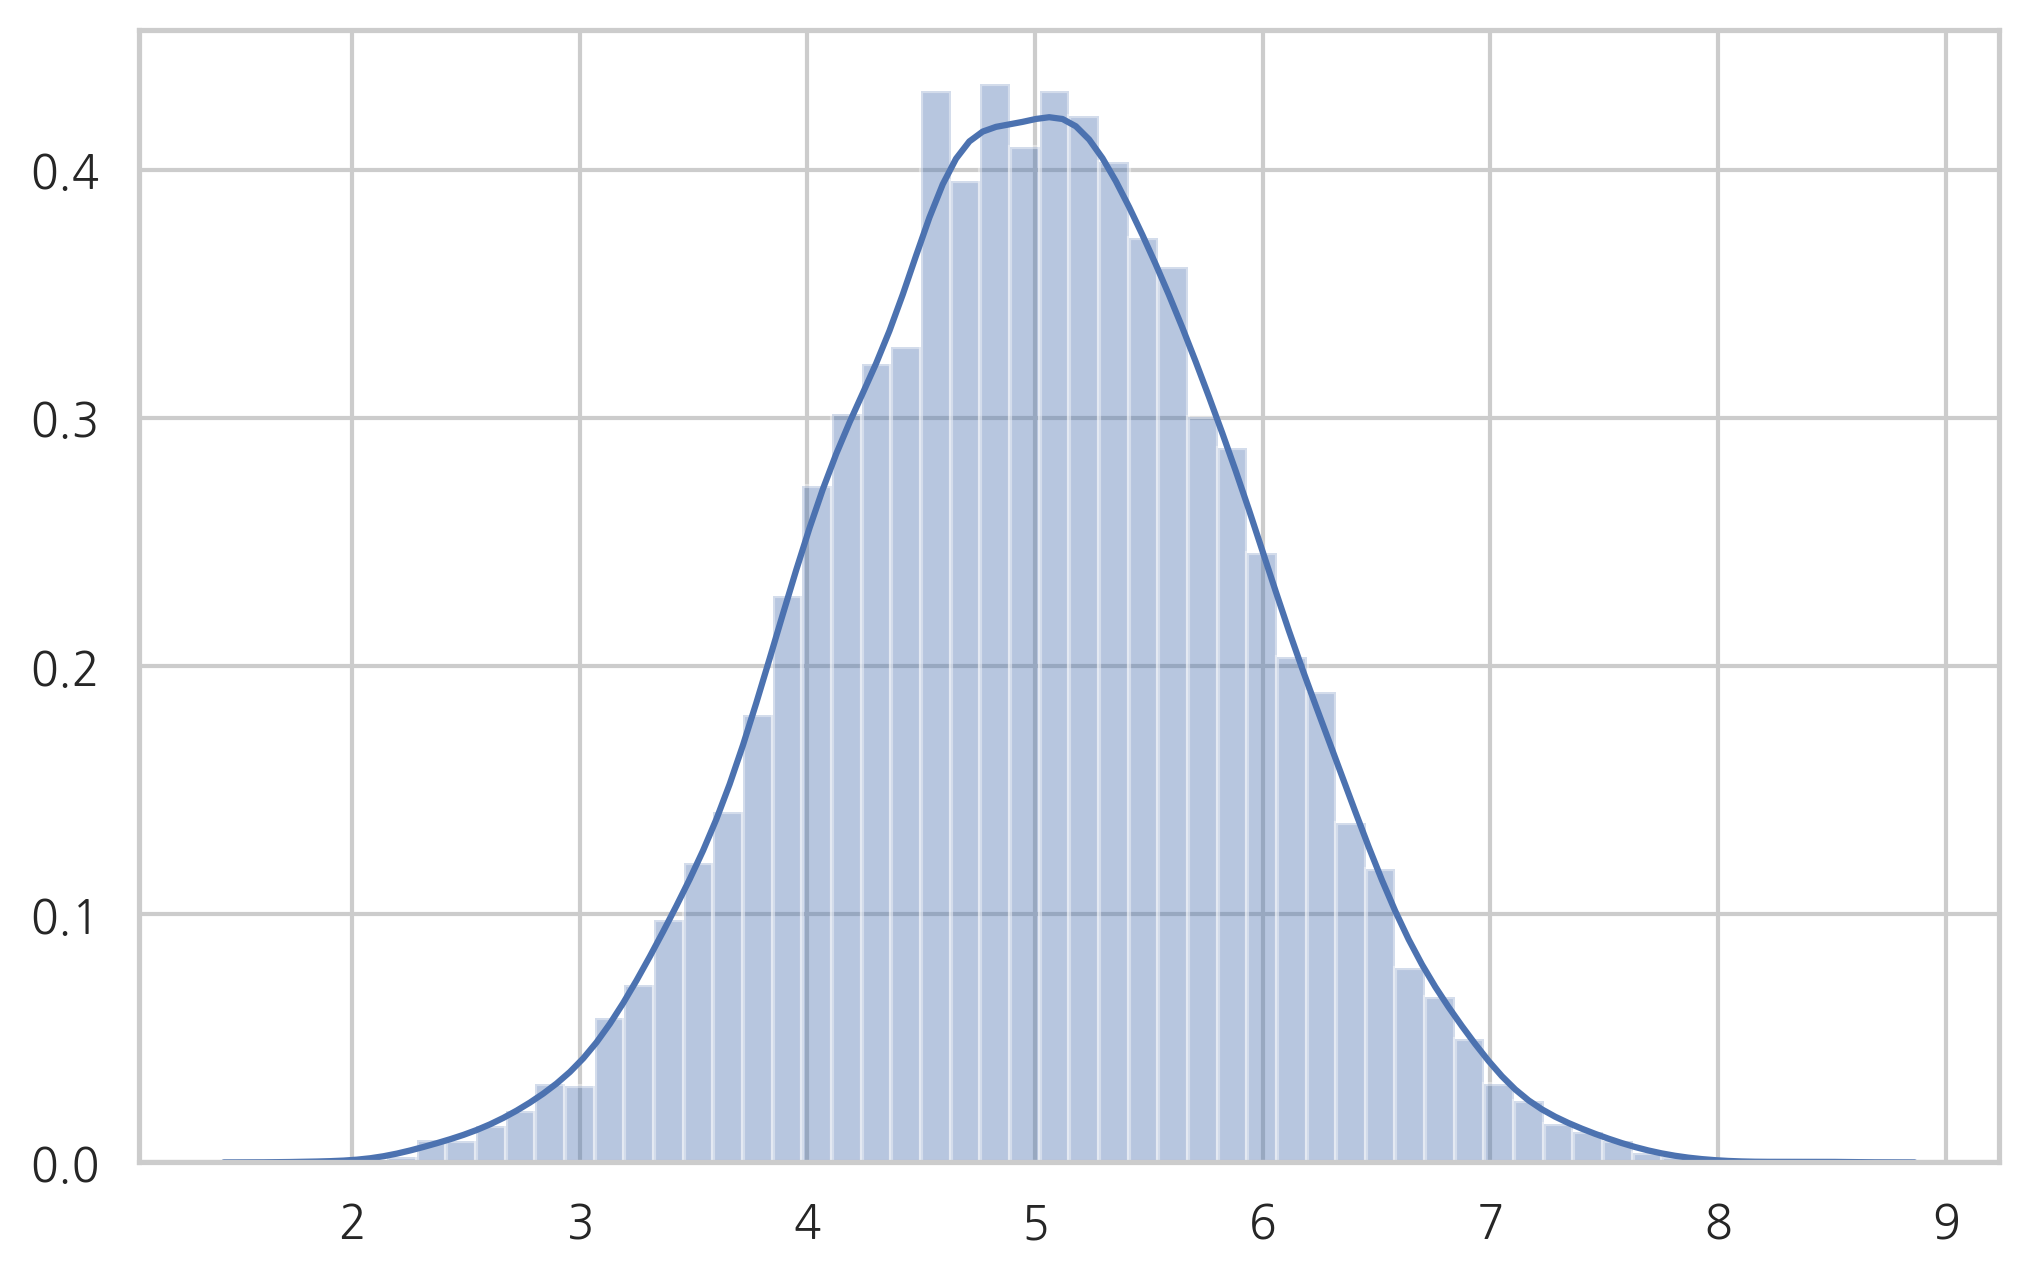

In [4]:
# 10개 생성을 10000번 반복
x = sp.stats.uniform().rvs((10, 10000))
# 10개 표본의 합이 10000개
s = x.sum(axis=0)
sns.distplot(s)
plt.show()

#### 연습 문제 8.2.1의 답

$$
\begin{align}
\begin{aligned}
\text{Bern}(x=1;\mu) &= \mu^1(1-\mu)^{(1-1)} = \mu^1(1-\mu)^0 = \mu \\
\text{Bern}(x=0;\mu) &= \mu^0(1-\mu)^{(1-0)} = \mu^0(1-\mu)^1 = 1-\mu 
\end{aligned}
\tag{A.8.1}
\end{align}
$$

#### 연습 문제 8.2.2의 답

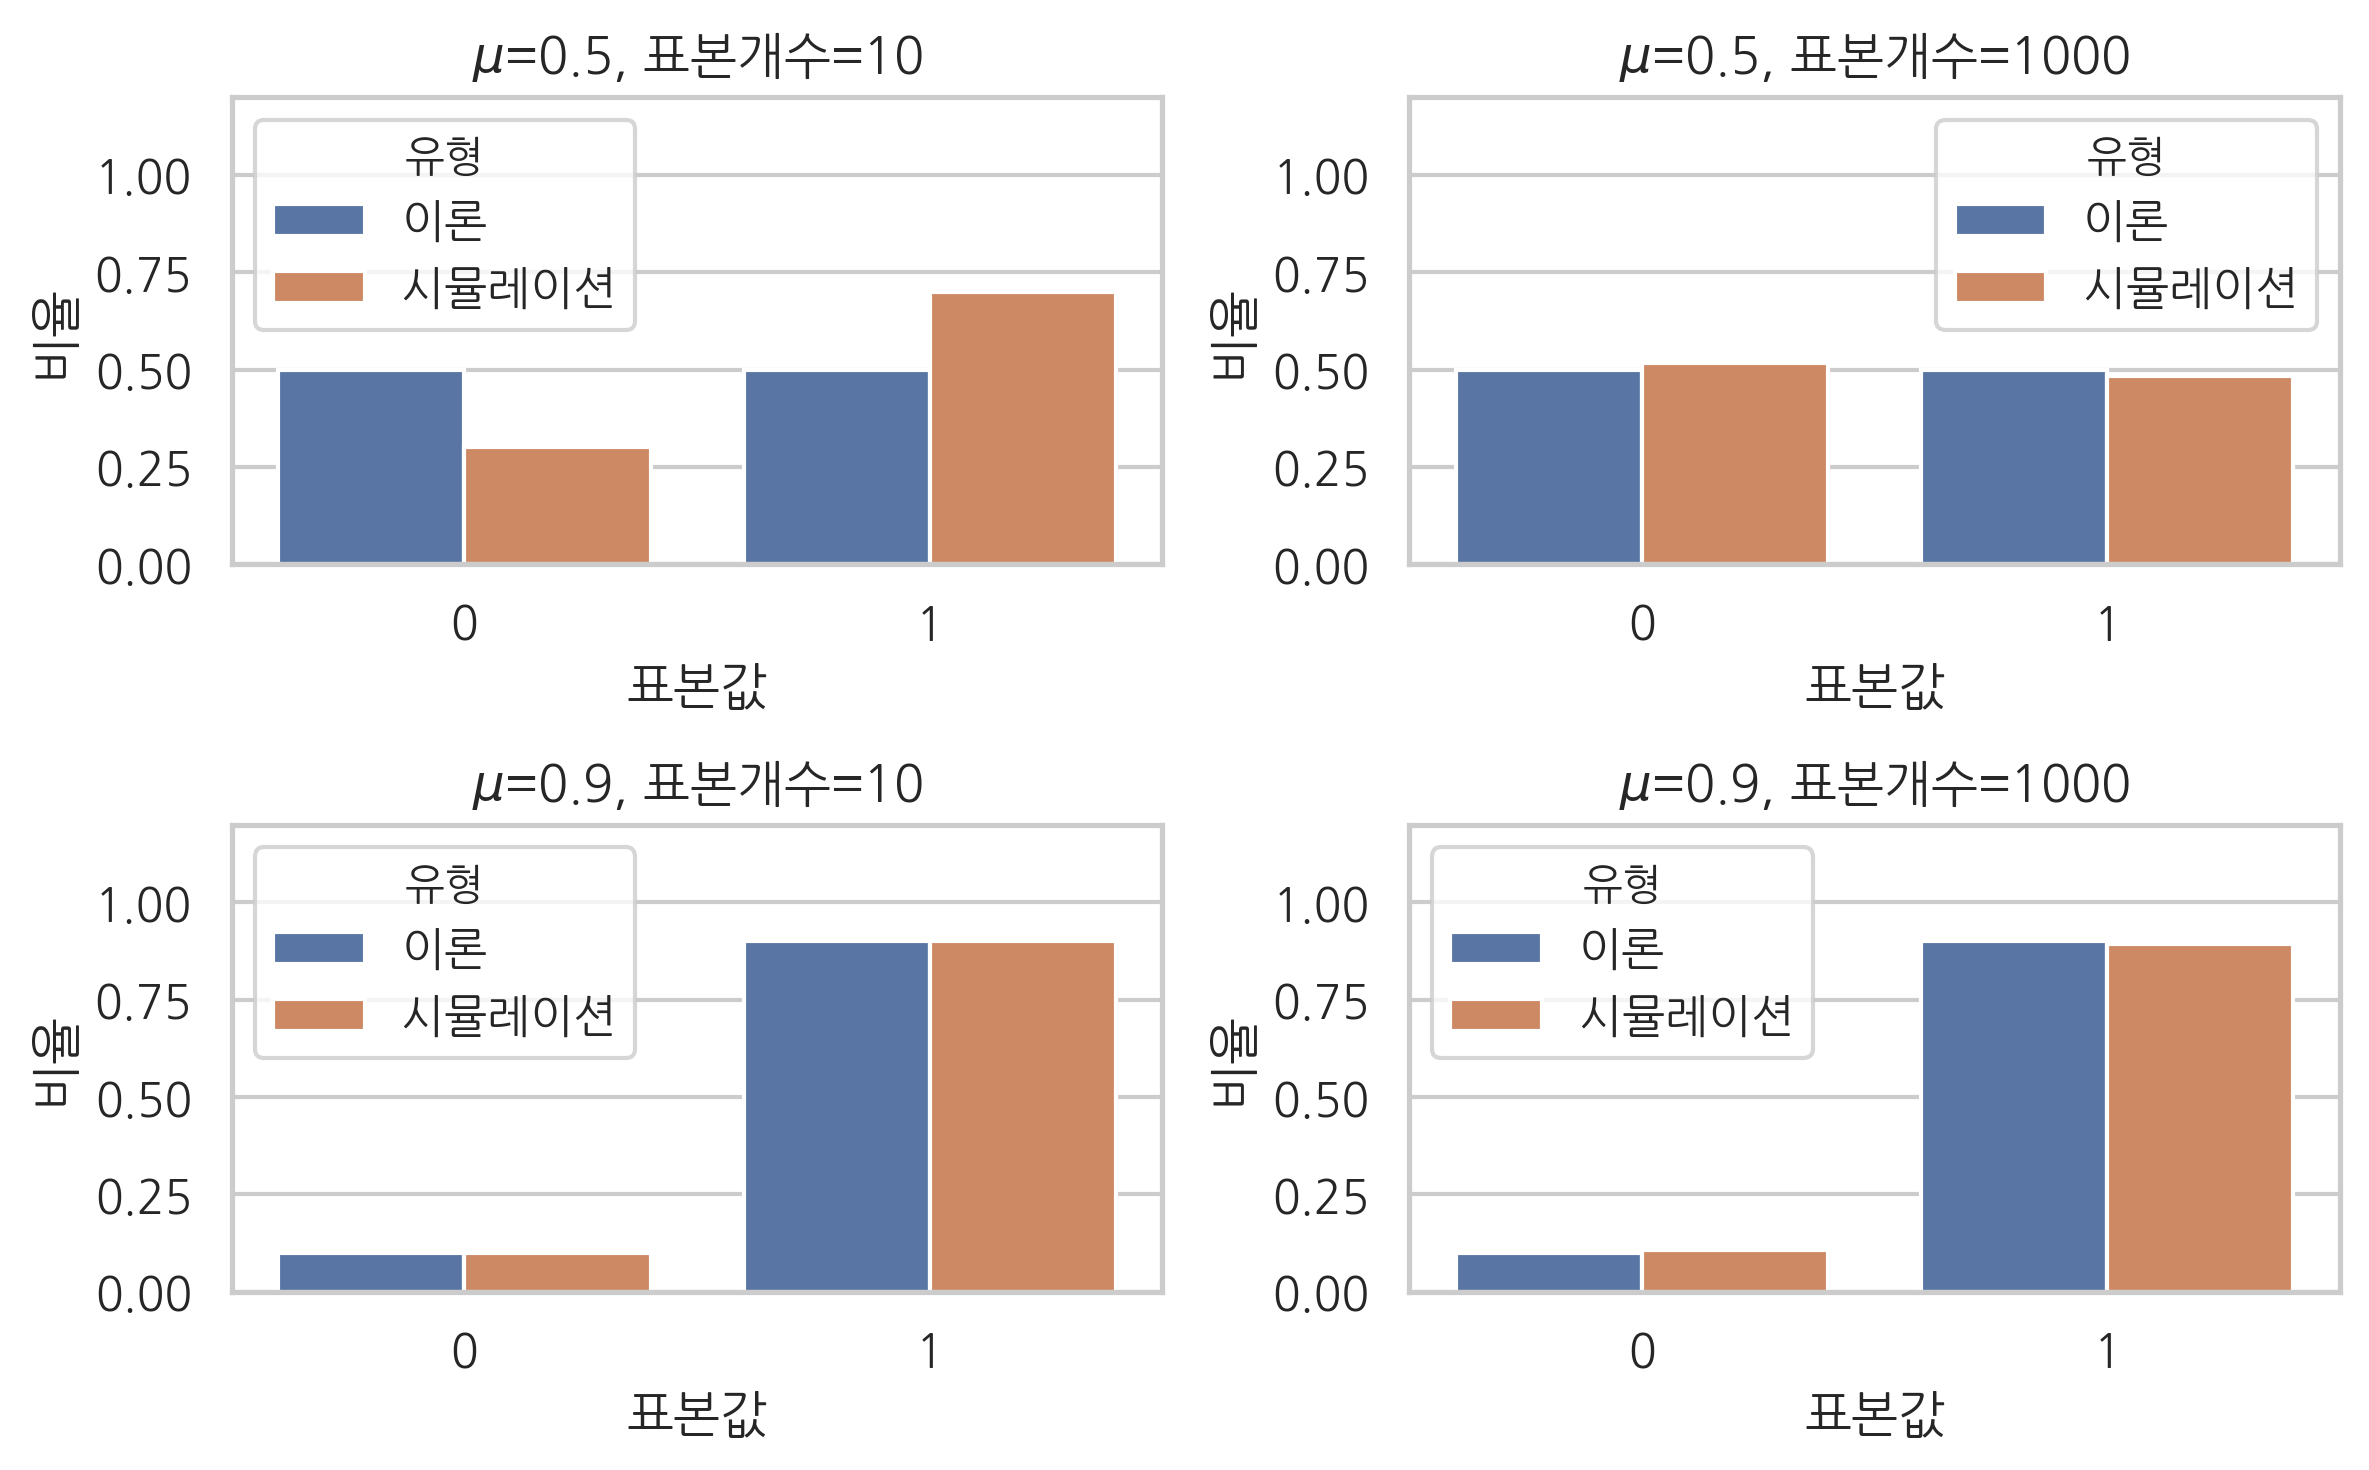

In [5]:
def plot_bernoulli(mu, M):
    rv = sp.stats.bernoulli(mu)
    x = rv.rvs(M, random_state=0)
    y = np.bincount(x, minlength=2) / float(len(x))
    xx = [0, 1]
    df = pd.DataFrame({"이론": rv.pmf(xx), "시뮬레이션": y})
    df.index = [0, 1]
    df2 = df.stack().reset_index()
    df2.columns = ["표본값", "유형", "비율"]
    sns.barplot(x="표본값", y="비율", hue="유형", data=df2)
    plt.title("$\mu$={}, 표본개수={}".format(mu, M))
    plt.ylim(0, 1.2)

plt.subplot(221)
plot_bernoulli(0.5, 10)
plt.subplot(222)
plot_bernoulli(0.5, 1000)
plt.subplot(223)
plot_bernoulli(0.9, 10)
plt.subplot(224)
plot_bernoulli(0.9, 1000)
plt.tight_layout()
plt.show()

#### 연습 문제 8.2.3의 답

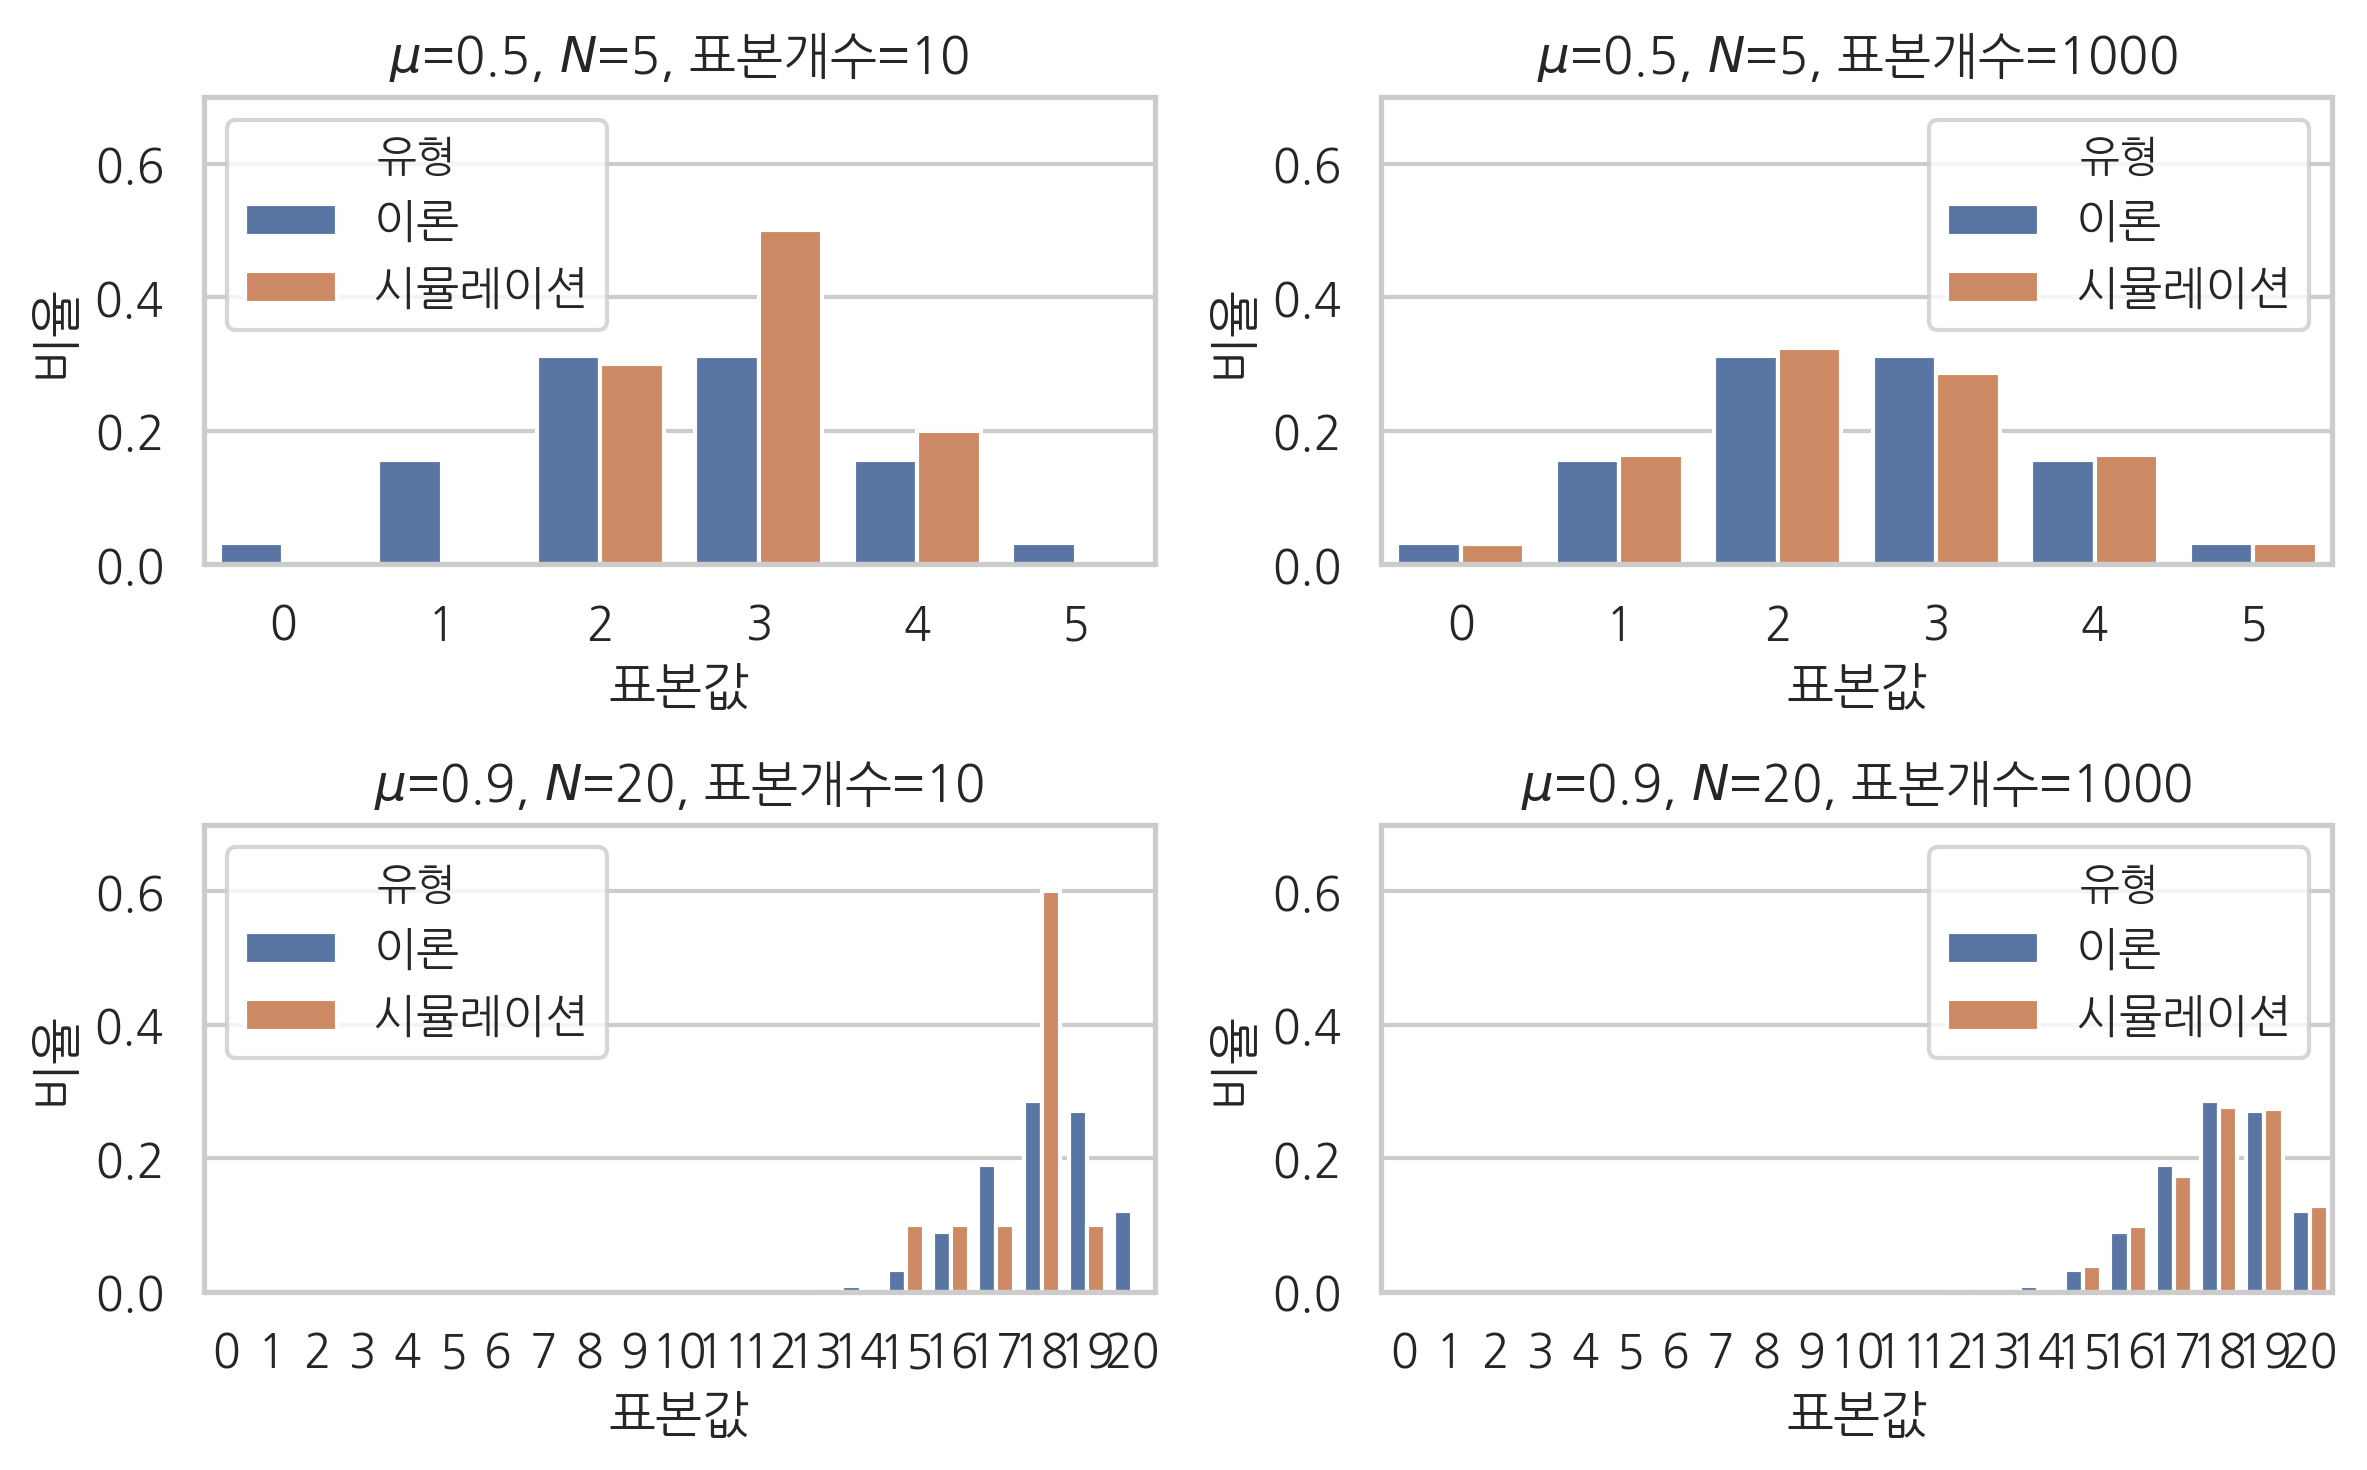

In [6]:
def plot_binom(mu, N, M):
    rv = sp.stats.binom(N, mu)
    x = rv.rvs(M, random_state=0)
    y = np.bincount(x, minlength=N+1)/float(len(x))
    xx = np.arange(N + 1)
    df = pd.DataFrame({"이론": rv.pmf(xx), "시뮬레이션": y})
    df = pd.DataFrame({"이론": rv.pmf(xx), "시뮬레이션": y}).stack()
    df = df.reset_index()
    df.columns = ["표본값", "유형", "비율"]
    df.pivot("표본값", "유형", "비율")
    sns.barplot(x="표본값", y="비율", hue="유형", data=df)
    plt.title("$\mu$={}, $N$={}, 표본개수={}".format(mu, N, M))
    plt.ylim(0, 0.7)

plt.subplot(221)
plot_binom(0.5, 5, 10)
plt.subplot(222)
plot_binom(0.5, 5, 1000)
plt.subplot(223)
plot_binom(0.9, 20, 10)
plt.subplot(224)
plot_binom(0.9, 20, 1000)
plt.tight_layout()
plt.show()

#### 연습 문제 8.2.4의 답

(1) 

$$
\begin{align}
\begin{aligned}
\mu_{\text{ham},1} &= \frac{0}{5} = 0 \\
\mu_{\text{ham},2} &= \frac{1}{5}  \\
\mu_{\text{ham},3} &= \frac{3}{5}  \\
\mu_{\text{ham},4} &= \frac{5}{5} = 1 \\
\end{aligned}
\tag{A.8.2}
\end{align}
$$

이 모수가 가지는 문제점은 다음과 같다.

* 첫 번째 모수가 0이므로 첫 번째 키워드는 절대 발생하지 않는다. 
* 마지막 모수가 1이므로 마지막 키워드는 항상 발생한다. 


(2) 

스팸 메일의 키워드 특성을 모형화하는데 베르누이 확률변수가 4개, 정상 메일의 키워드 특성을 모형화하는데 베르누이 확률변수가 4개, 도합 8개의 베르누이 확률변수가 필요하다.

#### 연습 문제 8.3.1의 답

$K=2$인 경우, 

$$
\begin{align}
\text{Cat}(x;\mu) = \mu_1^{x_1} \mu_2^{x_2} 
\tag{A.8.3}
\end{align}
$$

제약조건

$$
\begin{align}
\begin{aligned}
\mu_1 + \mu_2 &= 1 \\
\mu_2 &= 1 - \mu_1
\end{aligned}
\tag{A.8.4}
\end{align}
$$

으로부터

$$
\begin{align}
\text{Cat}(x;\mu) = \mu_1^{x_1} (1-\mu_1)^{x_2} 
\tag{A.8.5}
\end{align}
$$


$x$는 0과 1 두가지 값을 가지며 이때 원핫인코딩된 값은 각각 (1, 0), (0, 1)이다. 즉,

$$
\begin{align}
\begin{aligned}
x_1 + x_2 &= 1 \\
x_2 &= 1 - x_1
\end{aligned}
\tag{A.8.6}
\end{align}
$$

이 성립한다. 마찬가지로 확률분포함수에 대입하면

$$
\begin{align}
\text{Cat}(x_1;\mu) = \mu_1^{x_1} (1-\mu_1)^{1 - x_1} 
\tag{A.8.7}
\end{align}
$$

베르누이 확률분포와 같다는 것을 알 수 있다.

#### 연습 문제 8.3.2의 답

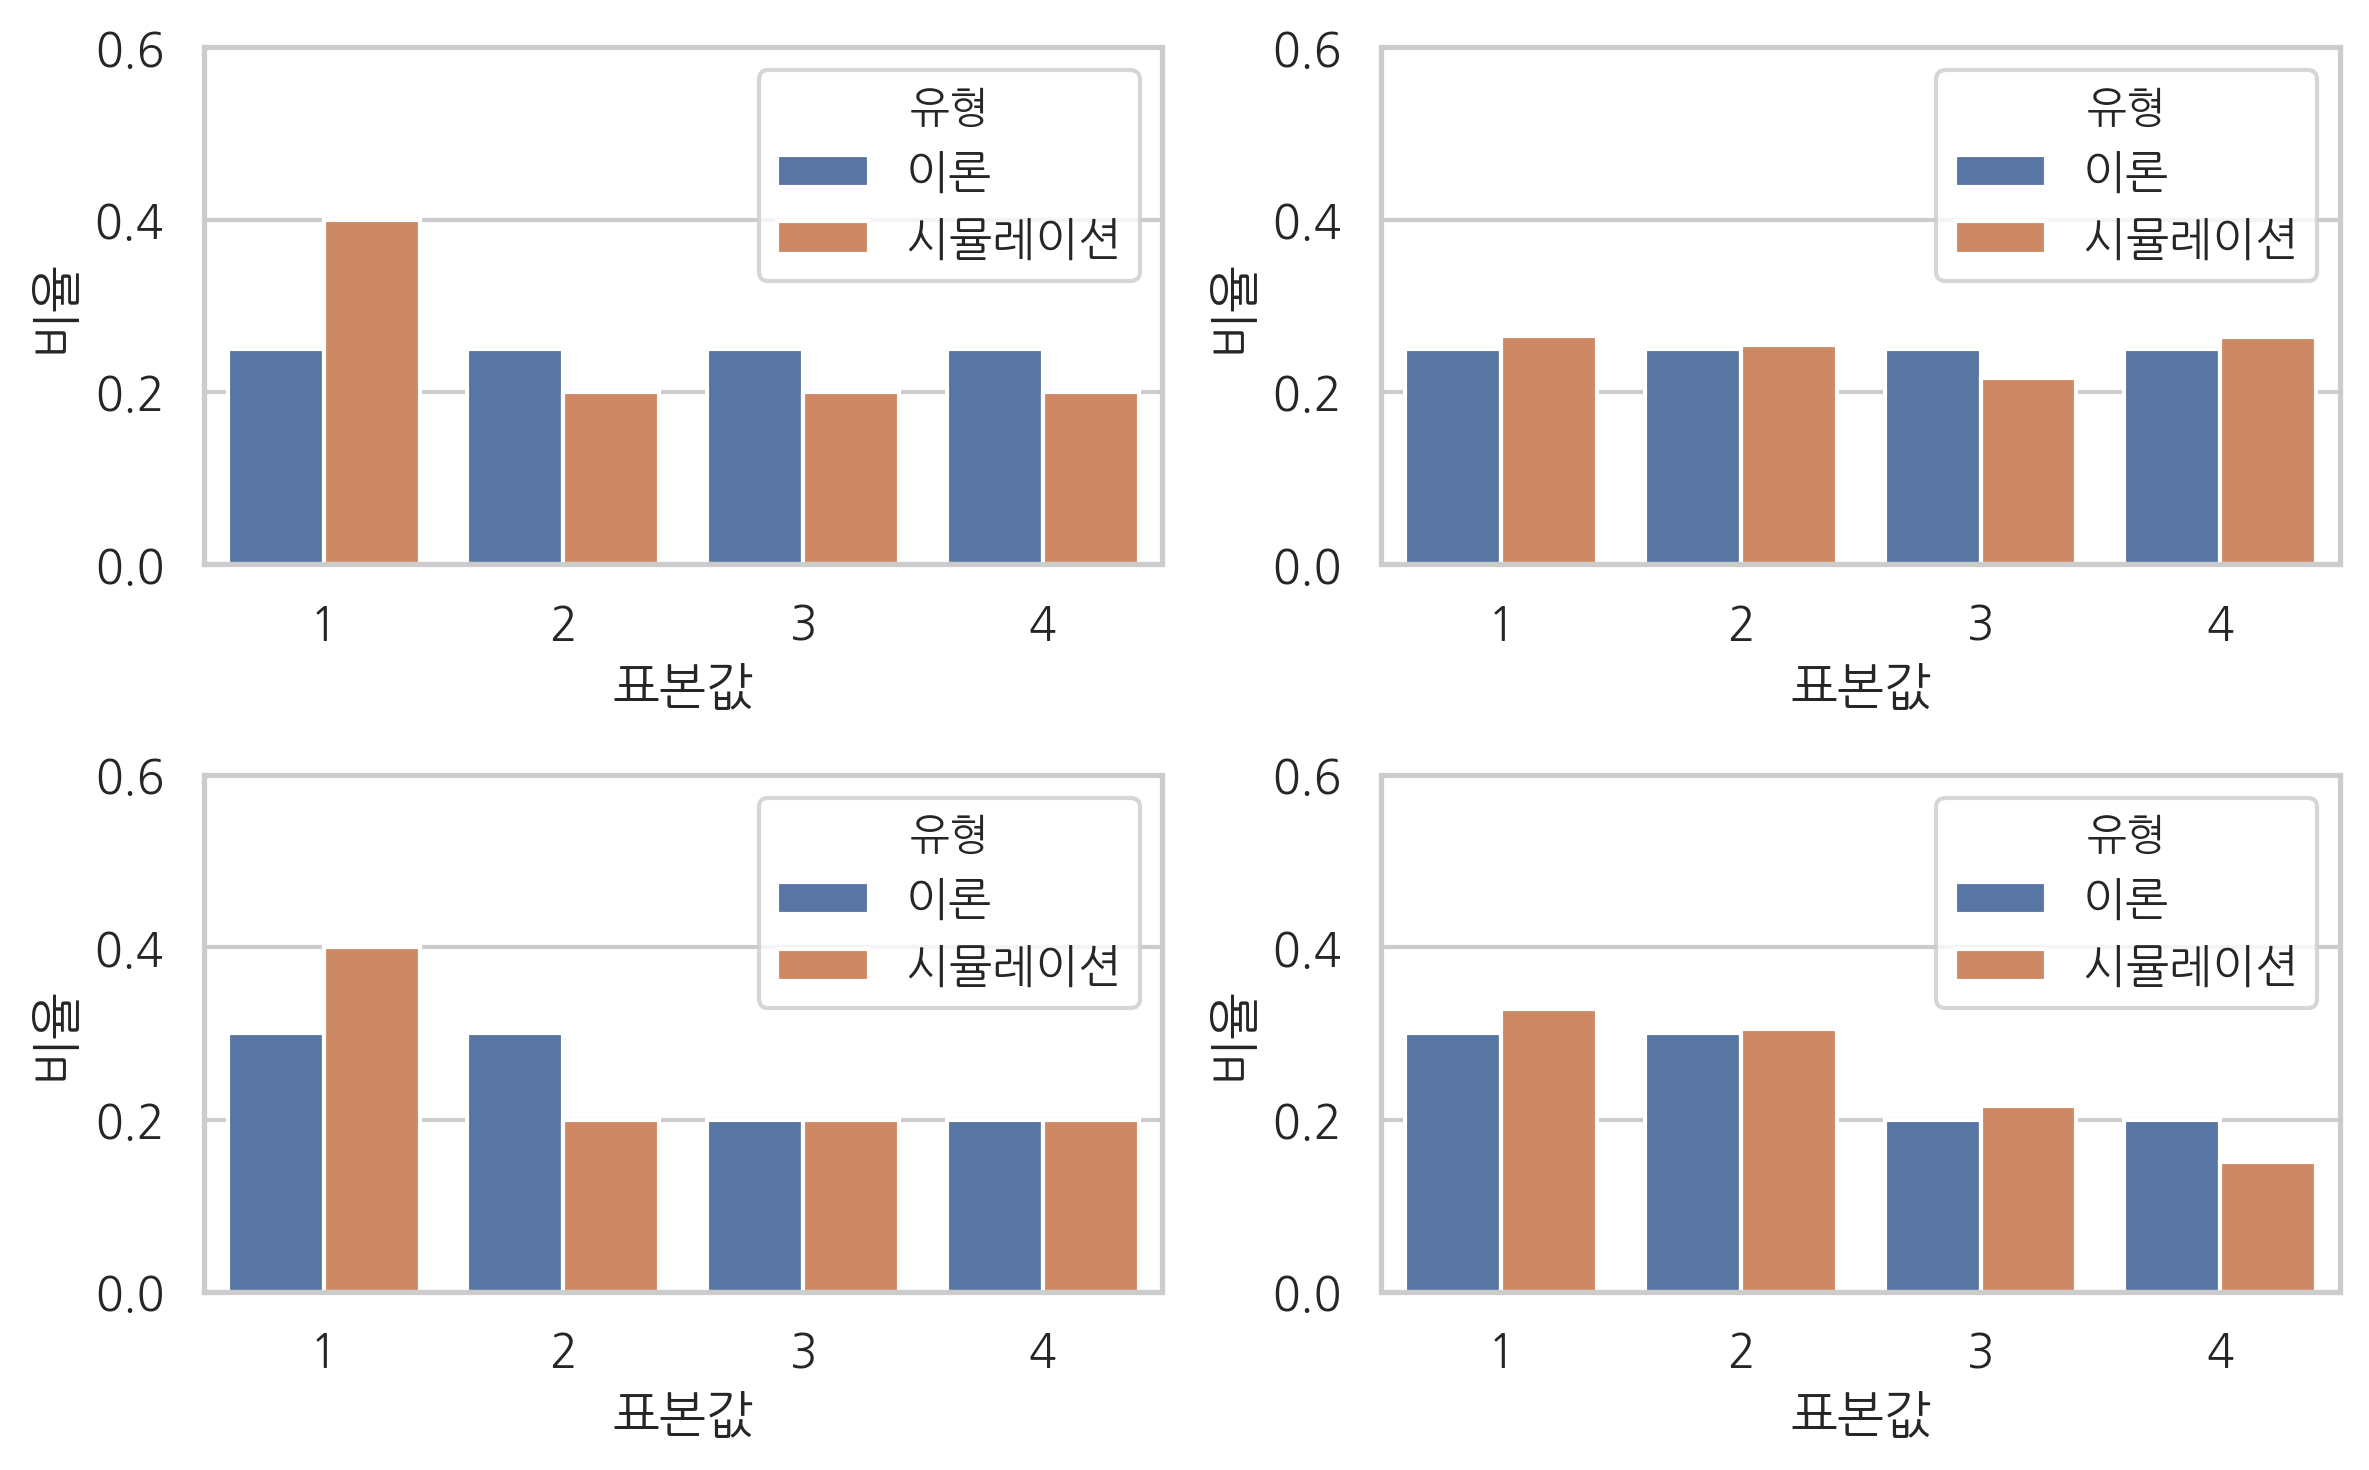

In [7]:
def plot_categorical(mu, N):
    rv = sp.stats.multinomial(1, mu)
    xx = np.arange(1, len(mu) + 1)
    xx_ohe = pd.get_dummies(xx)
    X = rv.rvs(N, random_state=0)
    y = X.sum(axis=0) / float(len(X))
    df = pd.DataFrame({"이론": rv.pmf(xx_ohe.values), "시뮬레이션": y},
                      index=xx).stack()
    df = df.reset_index()
    df.columns = ["표본값", "유형", "비율"]
    df.pivot("표본값", "유형", "비율")
    sns.barplot(x="표본값", y="비율", hue="유형", data=df)
    plt.ylim(0, 0.6)
    

mu1 = [0.25, 0.25, 0.25, 0.25]
N1 = 10
mu2 = [0.3,0.3,0.2,0.2]
N2 = 1000

plt.subplot(221)
plot_categorical(mu1, N1)
plt.subplot(222)
plot_categorical(mu1, N2)
plt.subplot(223)
plot_categorical(mu2, N1)
plt.subplot(224)
plot_categorical(mu2, N2)
plt.tight_layout()
plt.show()

#### 연습 문제 8.3.3의 답

$K=2$일 때 다항분포의 확률질량함수는 다음과 같다.

$$
\begin{align}
\text{Mu}(x;N,\mu) 
= \binom N {x_1, \cdots, x_K} \prod_{k=1}^K \mu_k^{x_k} 
= \binom N {x_1,x_2} \mu_1^{x_1} \mu_2^{x_2}
\tag{A.8.8}
\end{align}
$$

표본데이터의 총합이 $N$개이므로

$$
\begin{align}
x_1 + x_2 = N
\tag{A.8.9}
\end{align}
$$

이를 대입하면

$$
\begin{align}
\binom N {x_1,x_2} = \dfrac{N!}{x_1!x_2!} = \dfrac{N!}{x_1!(N-x_1)!} = \binom N {x_1}
\tag{A.8.10}
\end{align}
$$

$$
\begin{align}
\text{Mu}(x;N,\mu) 
= \binom N {x_1} \mu_1^{x_1} \mu_2^{N-x_2}
\tag{A.8.11}
\end{align}
$$

모수의 합이 1이므로

$$
\begin{align}
\text{Mu}(x;N,\mu) 
= \binom N {x_1} \mu_1^{x_1} (1-\mu_1)^{N-x_2}
\tag{A.8.12}
\end{align}
$$

이항분포의 확률질량함수와 같다.

#### 연습 문제 8.4.3의 답

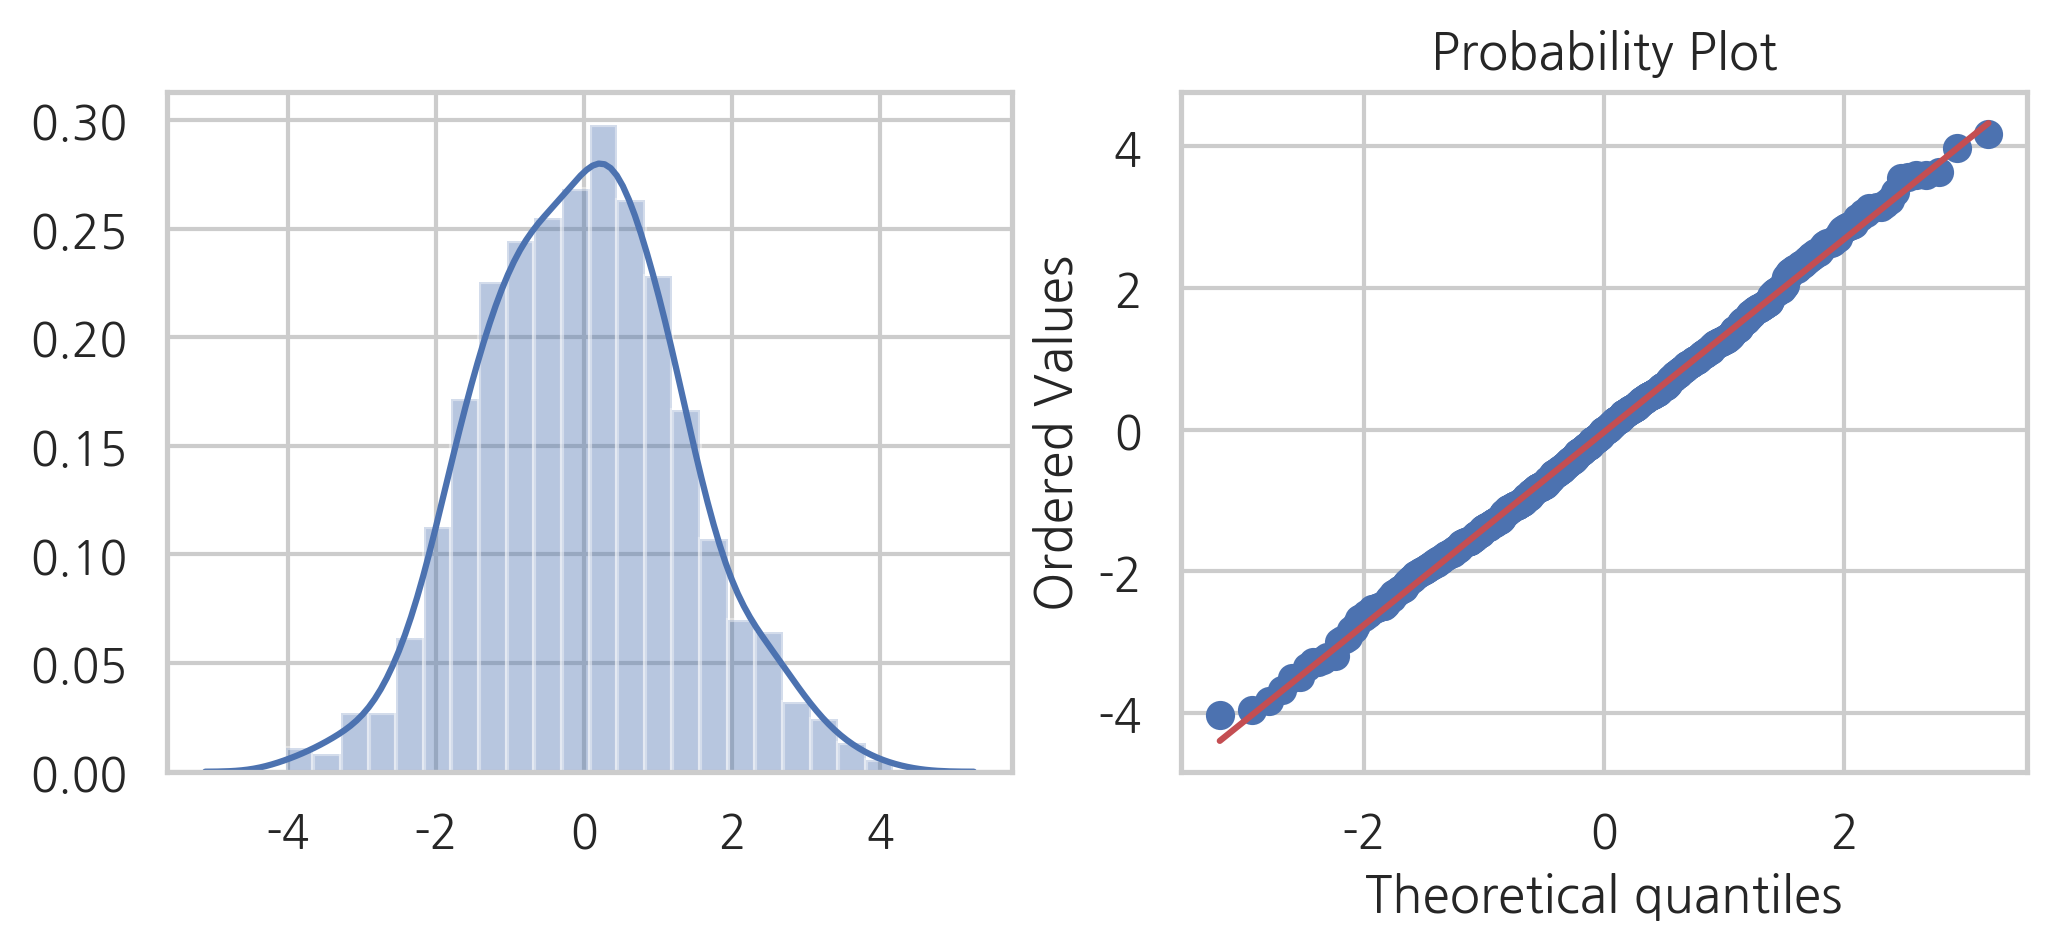

In [8]:
# (1)

N = 2
M = 1000
np.random.seed(0)
x = np.random.normal(size=(N, M))
s = x.sum(axis=0)

plt.figure(figsize=(8, 3))
plt.subplot(121)
sns.distplot(s)
plt.subplot(122)
sp.stats.probplot(s, plot=plt)
plt.show()

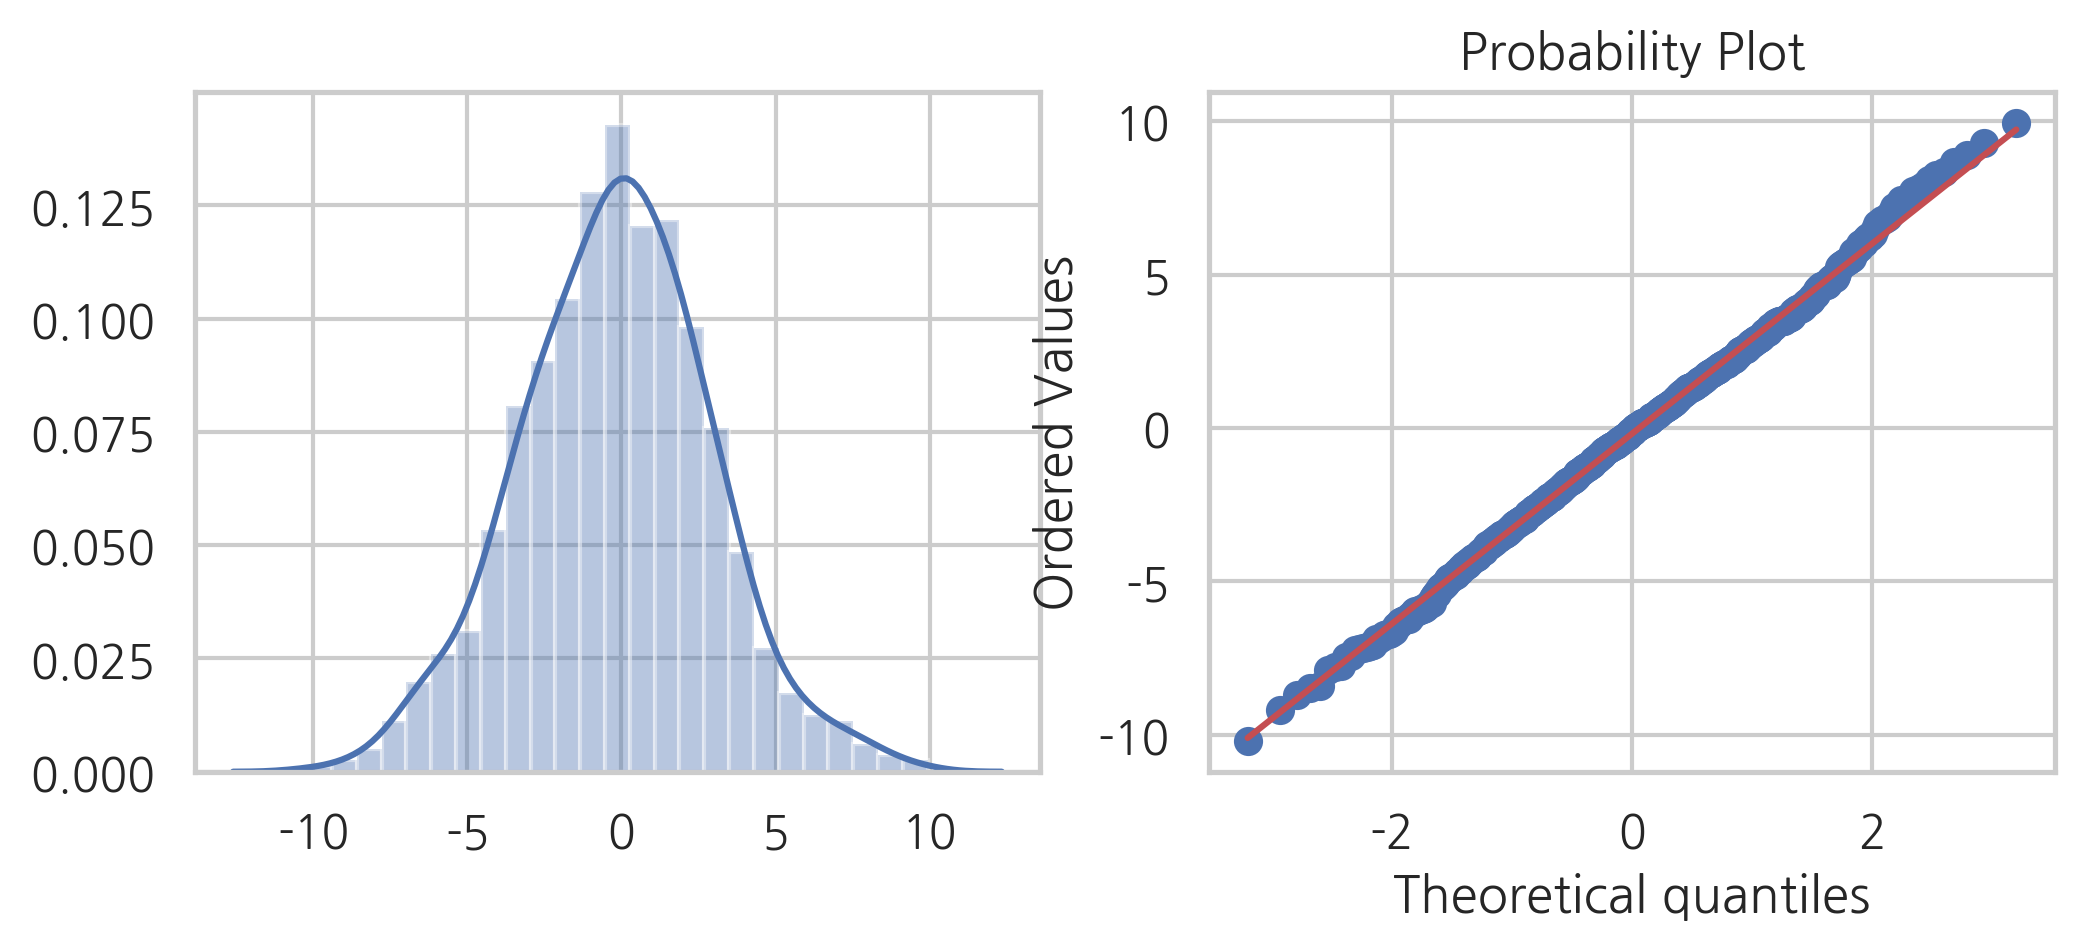

In [9]:
# (2)

N = 10
M = 1000
np.random.seed(0)
x = np.random.normal(size=(N, M))
s = x.sum(axis=0)

plt.figure(figsize=(8, 3))
plt.subplot(121)
sns.distplot(s)
plt.subplot(122)
sp.stats.probplot(s, plot=plt)
plt.show()

#### 연습 문제 8.5.1의 답

$N$이 증가할 수록 정규분포 모양에 가까워진다. 즉 중심극한정리에 의해 1보다 큰 값이 최빈값이 된다. 

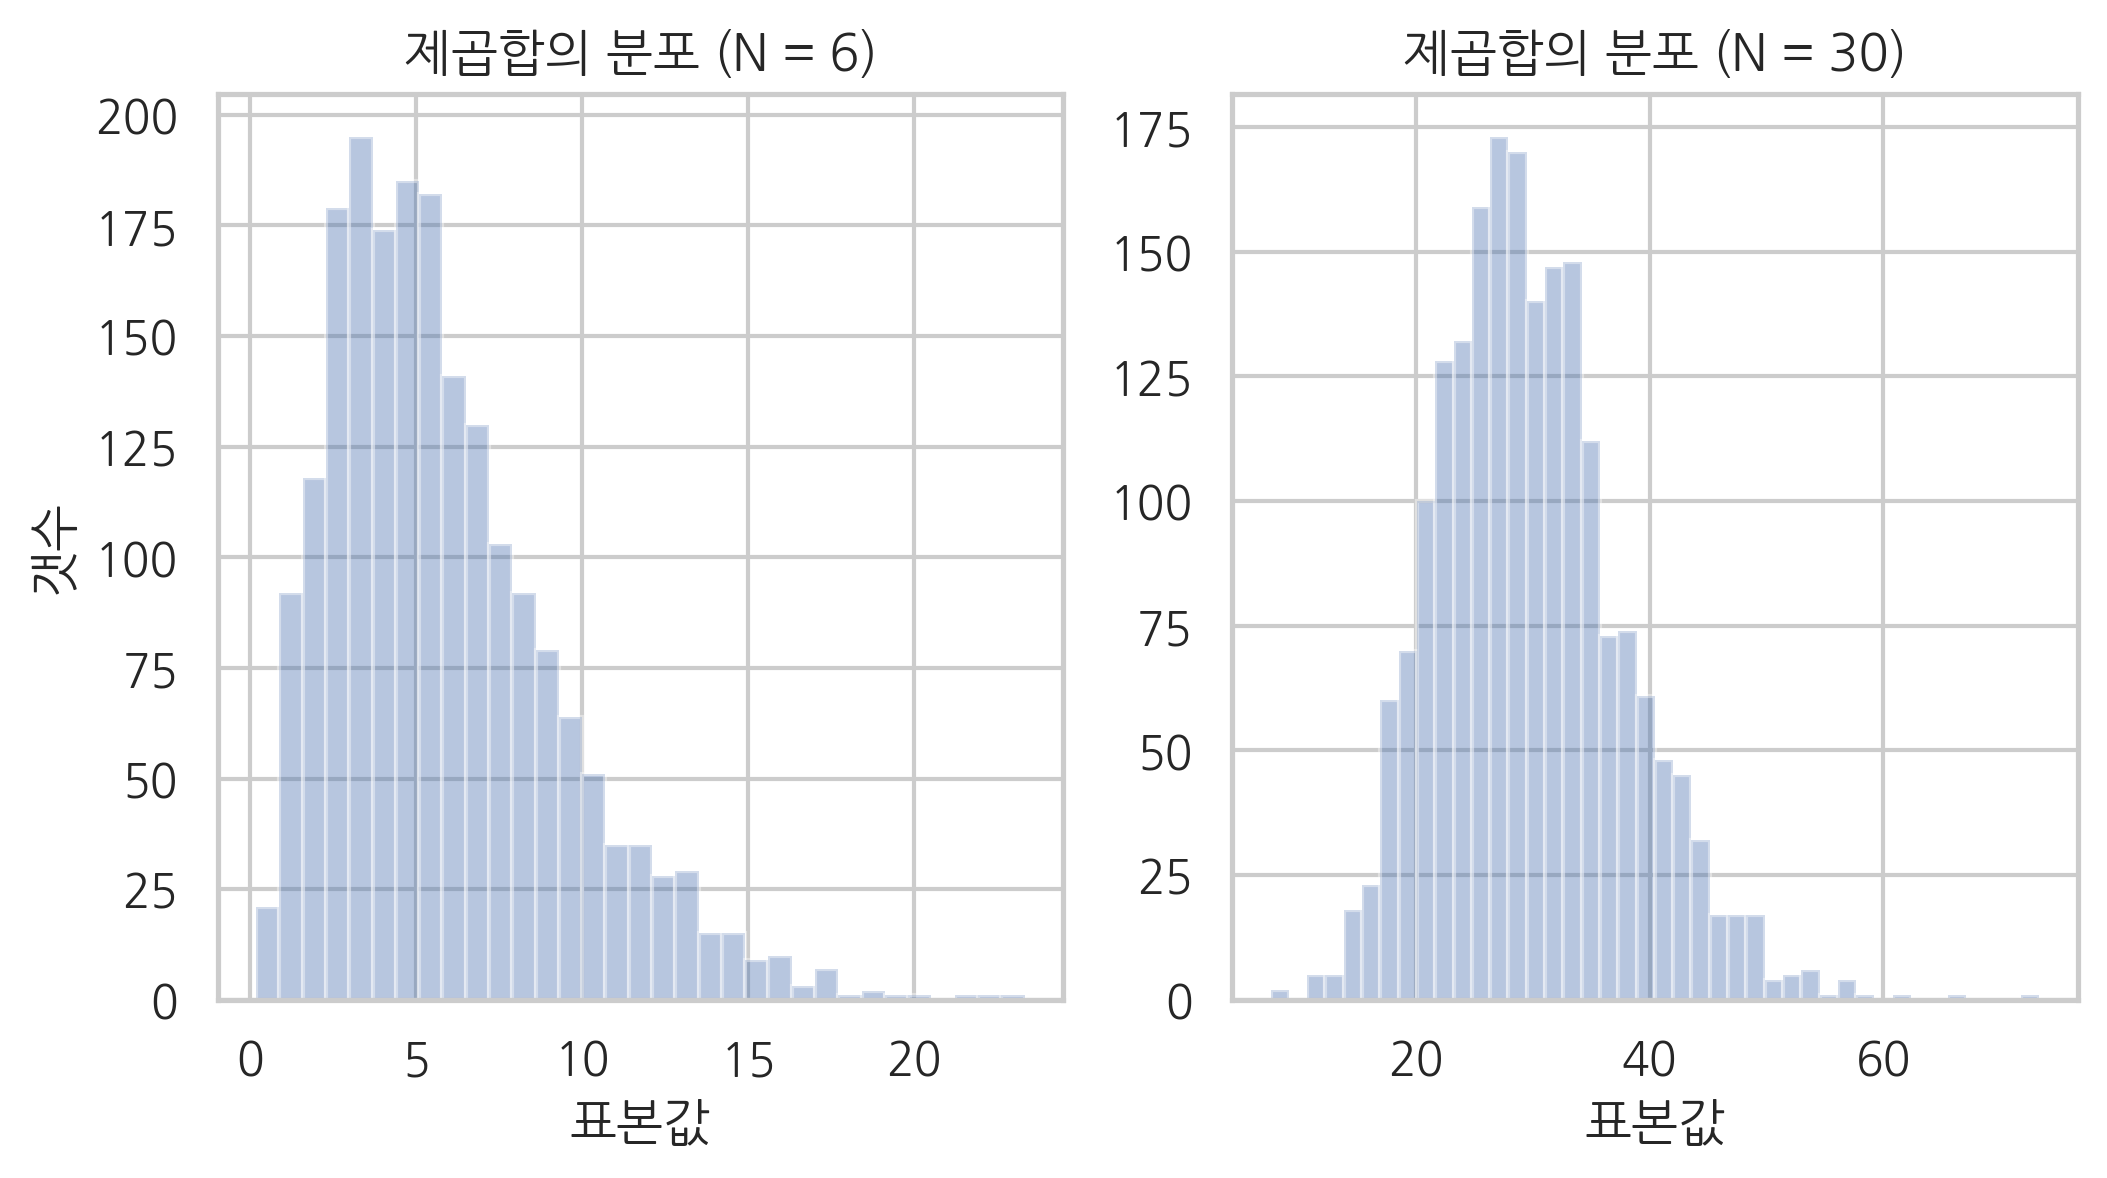

In [10]:
np.random.seed(0)

rv = sp.stats.norm()
M = 2000

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
N = 6
x = rv.rvs((N, M))
t = (x ** 2).sum(axis=0)
sns.distplot(t, kde=False)
plt.title("제곱합의 분포 (N = 6)")
plt.xlabel("표본값")
plt.ylabel("갯수")

plt.subplot(1, 2, 2)
N = 30
x = rv.rvs((N, M))
t = (x ** 2).sum(axis=0)
sns.distplot(t, kde=False)
plt.title("제곱합의 분포 (N = 30)")
plt.xlabel("표본값")

plt.show()

#### 연습 문제 8.5.2의 답

스튜던트 t분포의 표본값의 제곱의 분포와 F분포는 같은 모양이다. 다음 히스토그램에서 확인할 수 있다.

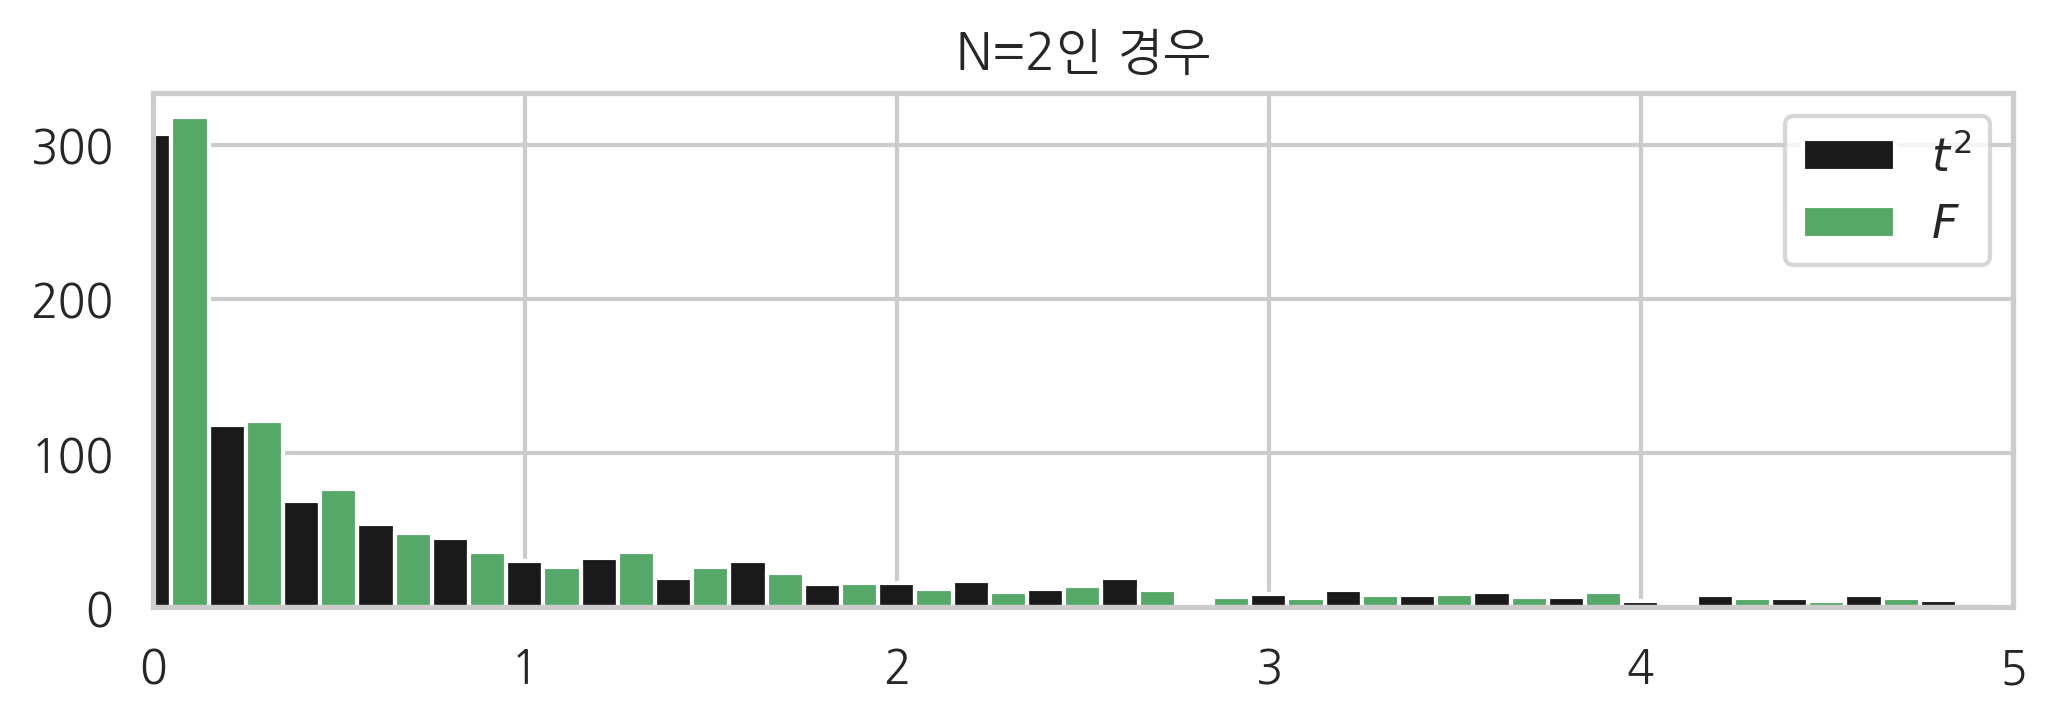

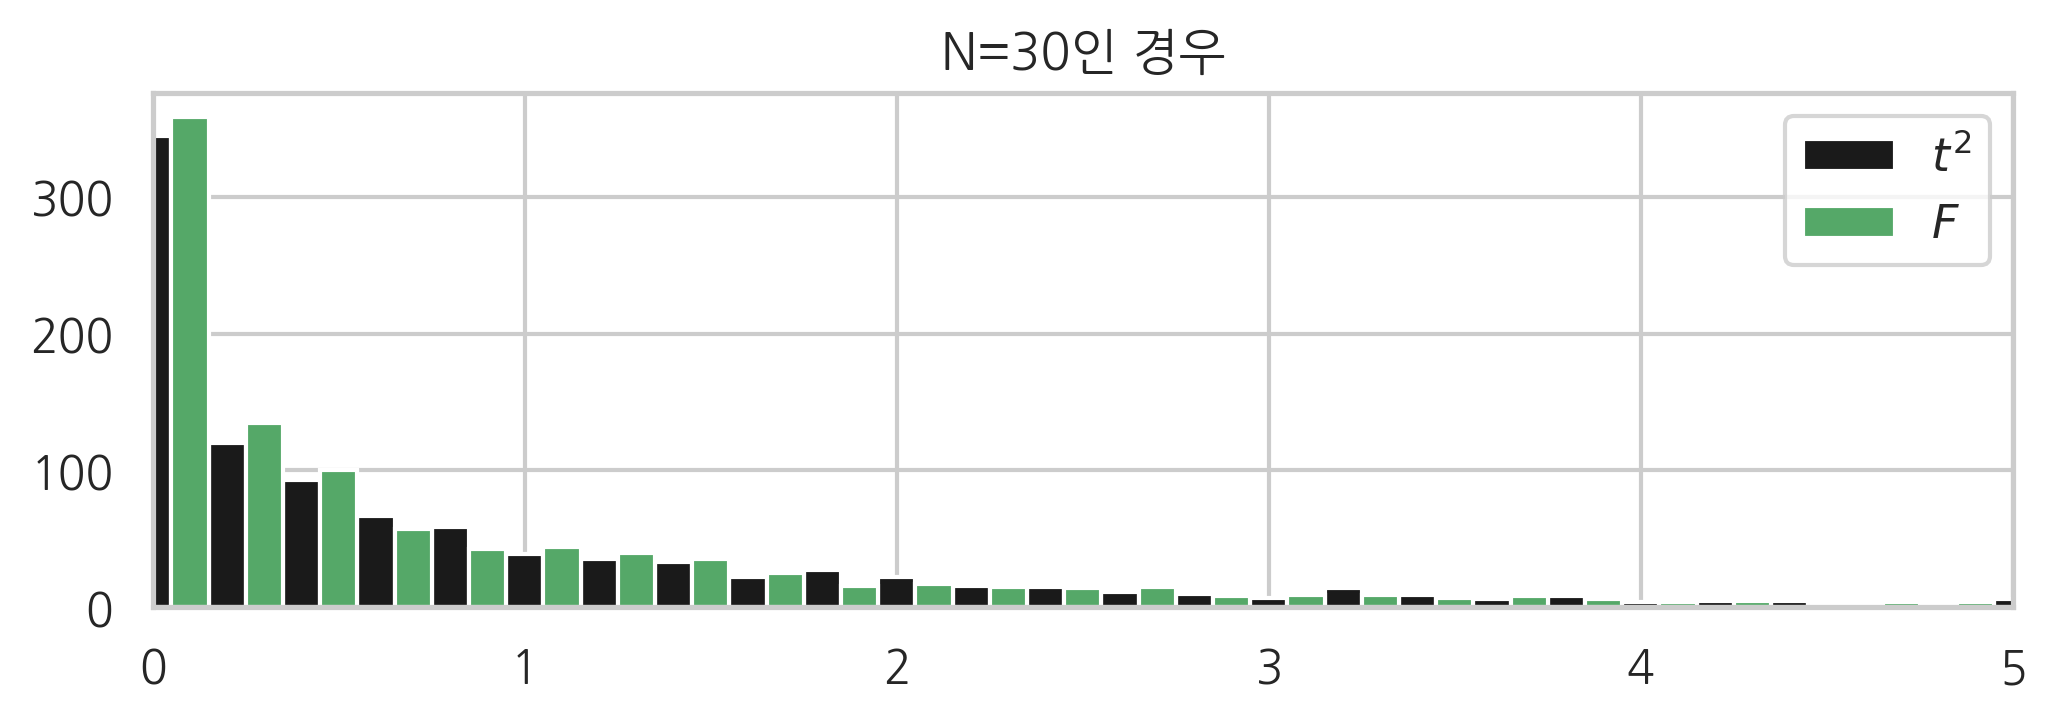

In [11]:
def plot_t2_f(N):
    np.random.seed(0)
    t2 = sp.stats.t(df=N).rvs(1000) ** 2
    f = sp.stats.f(1, N).rvs(1000)
    plt.hist(t2, bins=50, range=(0, 10), rwidth=0.5, 
             align="left", color="k", label="$t^2$")
    plt.hist(f, bins=50, range=(0, 10), rwidth=0.5, 
             align="mid", color="g", label="$F$")
    plt.xlim(0, 5)
    plt.legend()
    plt.title("N={}인 경우".format(N))
    plt.show()
    
    
plt.subplot(211)
plot_t2_f(2)
plt.subplot(212)
plot_t2_f(30)
plt.show()

#### 연습 문제 8.6.1의 답

다변수정규분포의 확률밀도함수의 등고선은 타원형이다. 기댓값 벡터가 (1,2)이므로 타원의 중심은 (1,2)가 된다. 공분산 행렬의 비대각성분이 음수이므로 두 변수가 음의 상관관계를 가진다. 따라서 등고선 타원의 방향은 2사분면과 4사분면 방향으로 기울어진다.

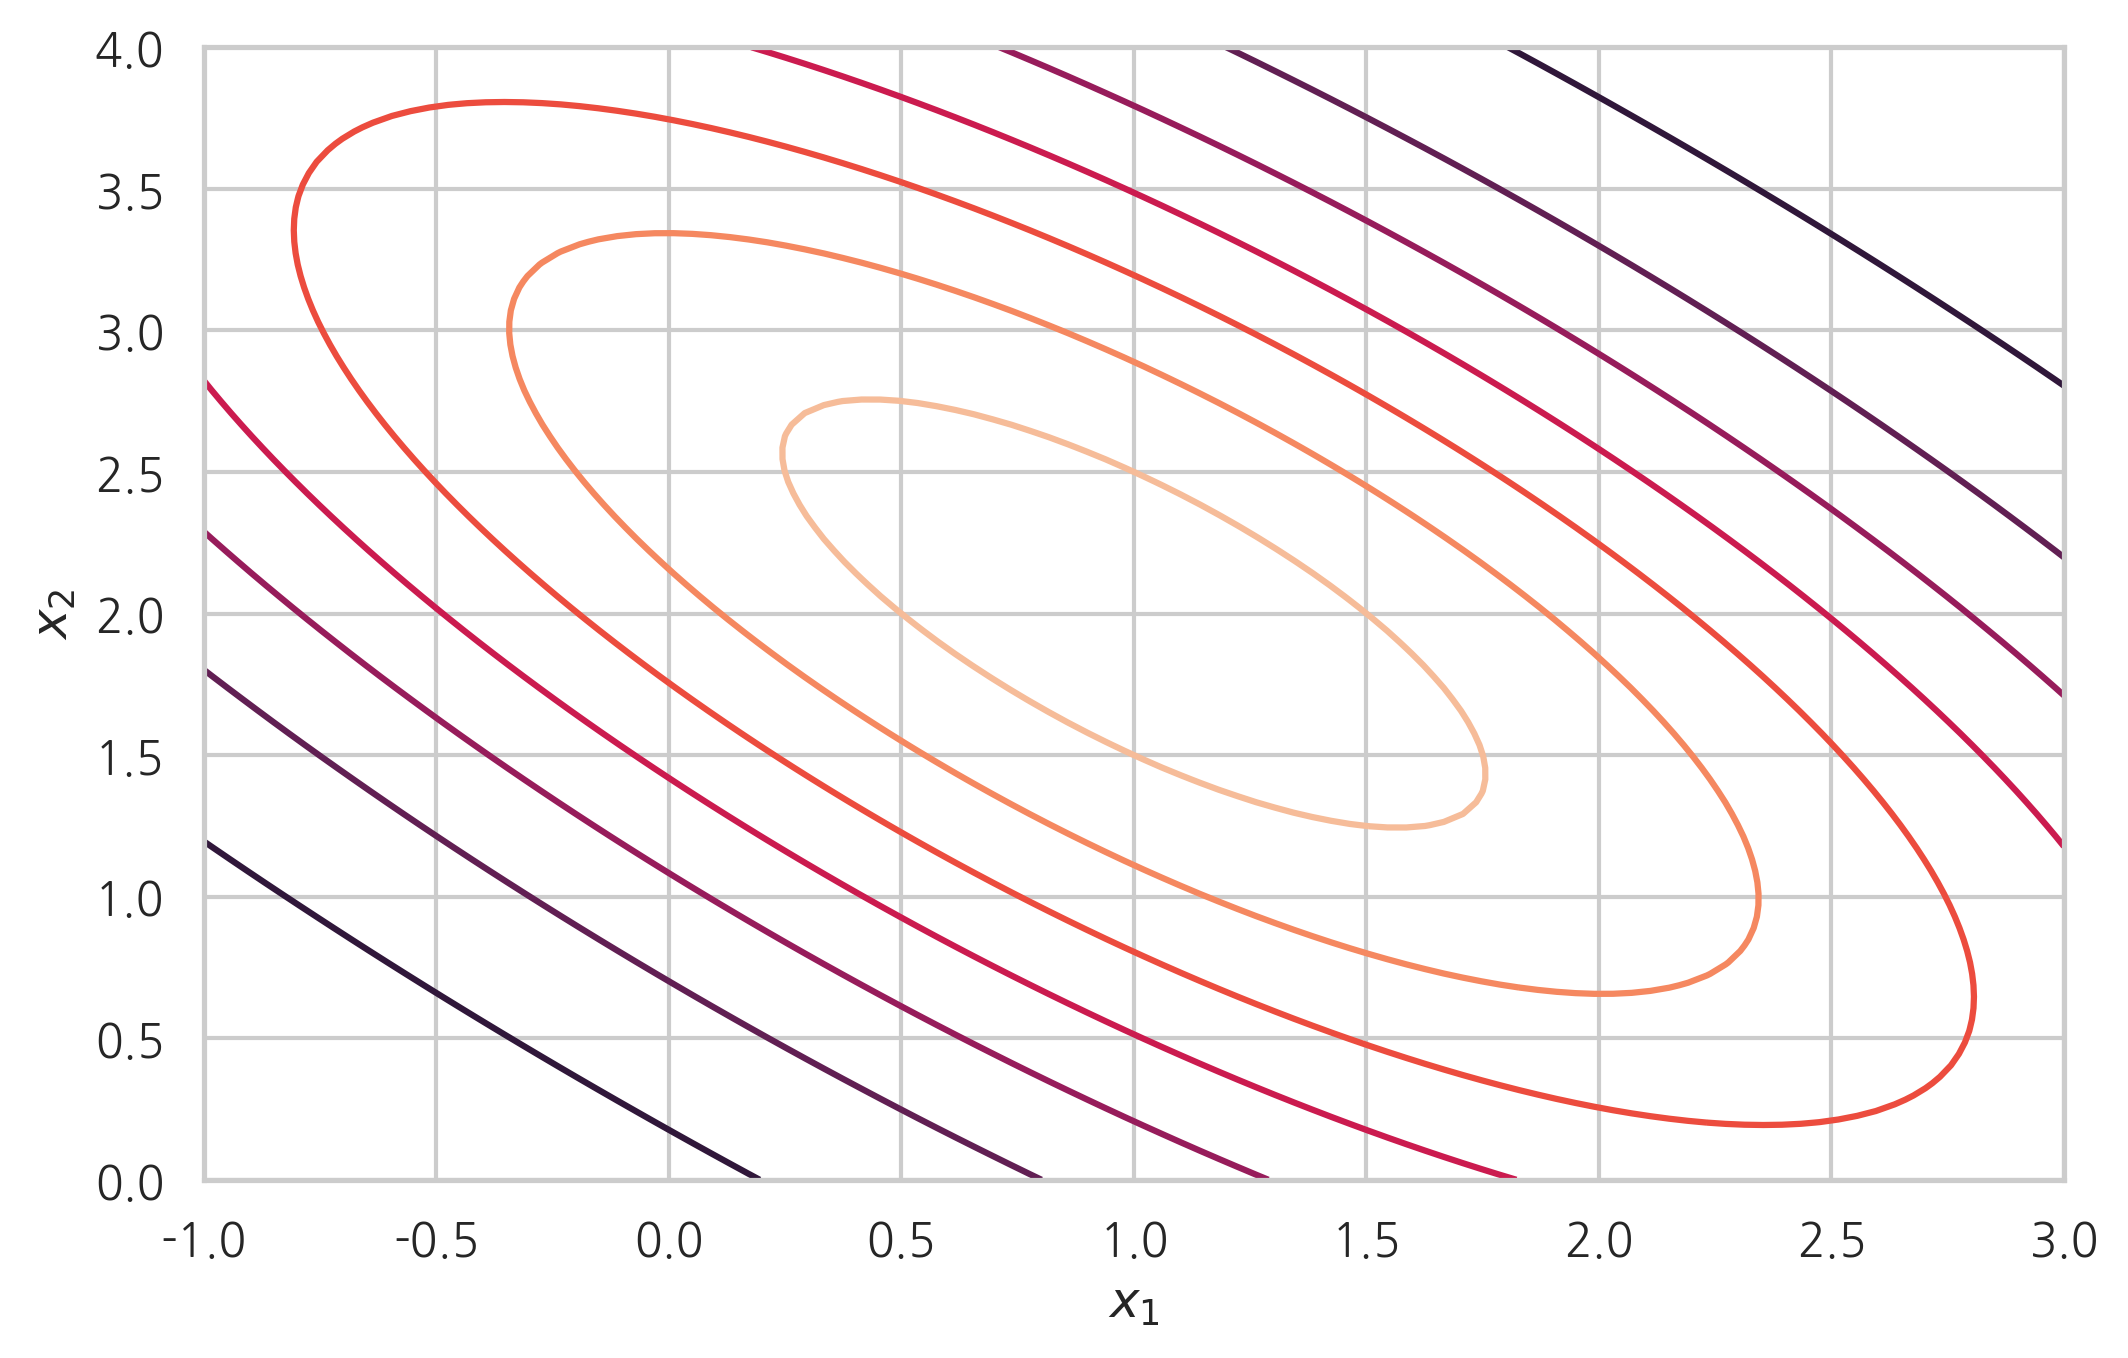

In [12]:
mu = [1, 2]
cov = [[4, -3], [-3, 4]]

rv = sp.stats.multivariate_normal(mu, cov)
xx = np.linspace(-1, 3, 100)
yy = np.linspace(0, 4, 100)
XX, YY = np.meshgrid(xx, yy)
plt.contour(XX, YY, rv.pdf(np.dstack([XX, YY])))
plt.xlim(-1, 3)
plt.ylim(0, 4)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

#### 연습 문제 8.6.2의 답

$x_2$가 주어졌을 때 $x_1$의 조건부기댓값 $\mu_{1|2}$과 조건부분산 $\Sigma_{1|2}$는 다음과 같다.

$$
\begin{align}
\mu_{1|2} = \mu_1 -\Lambda_{11}^{-1}\Lambda_{12}(x_2-\mu_2)
\tag{A.8.13}
\end{align}
$$ 

$$
\begin{align}
\Sigma_{1|2} = \Lambda_{11}^{-1} = \Sigma_{11} − \Sigma_{12}\Sigma_{22}^{-1}\Sigma_{21}
\tag{A.8.14}
\end{align}
$$

$x_1$과 $x_2$가 각각 스칼라인 2차원정규분포의 경우 기대값벡터와 공분산행렬은

$$
\begin{align}
\mu = \begin{bmatrix} \mu_1 \\ \mu_2 \end{bmatrix}
,\;\;
\Sigma = 
\begin{bmatrix}
\sigma_1^2           & \rho\sigma_1\sigma_2 \\
\rho\sigma_1\sigma_2 & \sigma_2^2           \\
\end{bmatrix}
\tag{A.8.15}
\end{align}
$$

이다. 여기에서 정밀도행렬은 다음과 같다. 

$$
\begin{align}
\begin{aligned}
\Lambda 
&= \Sigma^{-1} \\
&= 
\begin{bmatrix}
\Lambda_{11} & \Lambda_{12} \\
\Lambda_{21} & \Lambda_{22} \\
\end{bmatrix} \\
&=
\frac{1}{(1-\rho^2)\sigma_1^2\sigma_2^2}
\begin{bmatrix}
\sigma_2^2           & -\rho\sigma_1\sigma_2 \\
-\rho\sigma_1\sigma_2 & \sigma_1^2           \\
\end{bmatrix} \\
&=
\begin{bmatrix}
\frac{1}{(1-\rho^2)\sigma_1^2}           & -\frac{\rho}{(1-\rho^2)\sigma_1\sigma_2} \\
-\frac{\rho}{(1-\rho^2)\sigma_1\sigma_2} & \frac{1}{(1-\rho^2)\sigma_2^2}            \\
\end{bmatrix}
\end{aligned}
\tag{A.8.16}
\end{align}
$$

이를 조건부기댓값 및 조건부분산 공식에 대입한다.

$$
\begin{align}
\begin{aligned}
\mu_{1|2} 
&= \mu_1 -\Lambda_{11}^{-1}\Lambda_{12}(x_2-\mu_2) \\
&= \mu_1 -((1-\rho^2)\sigma_1^2)\left(-\frac{\rho}{(1-\rho^2)\sigma_1\sigma_2}\right)(x_2-\mu_2) \\
&= \mu_1 + \dfrac{\rho\sigma_1\sigma_2}{\sigma_2^2}(x_2 - \mu_2)
\end{aligned}
\tag{A.8.17}
\end{align}
$$ 

$$
\begin{align}
\begin{aligned}
\Sigma_{1|2} 
&= \Lambda_{11}^{-1} \\
&= (1-\rho^2)\sigma_1^2 \\
&= \sigma_1^2 - \dfrac{(\rho\sigma_1\sigma_2)^2}{\sigma_2^2}
\end{aligned}
\tag{A.8.18}
\end{align}
$$

#### 연습 문제 8.7.1의 답

모수의 추정치는 베타분포의 최빈값이다.

$$
\begin{align}
\text{mode} = \dfrac{a - 1}{a+b - 2} = \dfrac{1}{3}
\tag{A.8.19}
\end{align}
$$

추정치의 오차는 베타분포의 표준편차다.

$$
\begin{align}
\text{Var}[x] = \dfrac{ab}{(a+b)^2(a+b+1)} = 0.2^2 = \dfrac{1}{25}
\tag{A.8.20}
\end{align}
$$

이 두식을 연립하여 풀면 다음과 같다.

최빈값식에서

$$
\begin{align}
b = 2a -1 
\tag{A.8.21}
\end{align}
$$

이를 분산식에 대입하면 2차방정식이 된다.

$$
\begin{align}
27a^2 - 68a + 28 = (a-2)(27a-14)
\tag{A.8.22}
\end{align}
$$

$a$가 1보다 큰 해는 

$$ 
\begin{align}
a = 2, b = 3
\tag{A.8.23}
\end{align}
$$

이다.